一般に勾配降下法 (step28) より早く解に辿り着くとされるニュートン法を実装する。

勾配降下法は一次微分の情報だけを使うが、ニュートン法は二次微分の情報も使う。

テイラー展開より、

$$
f(x) \simeq f(a) + f'(a)(x-a) + f''(a)(x-a)^2
$$

この二次関数の最小値は解析的に求められ、

$$
\frac{\mathrm{d}}{\mathrm{d} x} \{ f(a) + f'(a)(x-a) + f''(a)(x-a)^2 \} = 0 \\
\therefore x = a - \frac{f'(a)}{f''(a)}
$$

つまり、$- \frac{f'(a)}{f''(a)}$だけ$a$の位置を更新する。

(勾配降下法では、$-\alpha f'(a)$だけ更新するので、$\alpha=\frac{1}{f''(a)}$の特別な状況とみなすこともできる。)

In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

if "__file__" in globals():
    sys.path.append(str((Path(__file__).parent / "..").resolve()))
else:
    sys.path.append(str(Path(os.getcwd(), "..").resolve()))
from dezero.core_simple import Variable
# import dezero's simple_core explicitly
# import dezero
# if not dezero.is_simple_core:
# from dezero.core_simple import Variable
# from dezero.core_simple import setup_variable
# setup_variable()

In [2]:
def f(x):
    """ニュートン法で解いてみる問題"""
    y = x**4 - 2 * x**2
    return y

In [3]:
def gx2(x):
    """f(x)の二階微分"""
    return 12 * x**2 - 4

In [4]:
x = Variable(np.array(2.0))
iters = 10

In [5]:
from array import array

x_histories = array("f")
y_histories = array("f")
for i in range(iters):
    print(i, x)

    y = f(x)
    x_histories.append(x.data.item())
    y_histories.append(y.data.item())

    x.cleargrad()
    y.backward()

    x.data -= x.grad / gx2(x.data)

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


最適化の様子の可視化

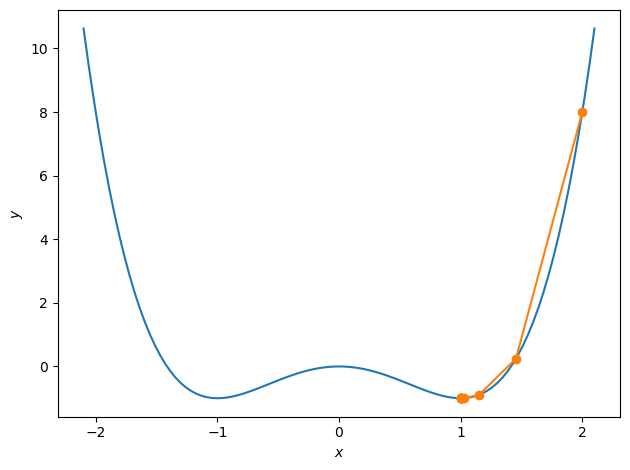

In [6]:
x4plot = np.linspace(-2.1, 2.1, 101)

fig, ax = plt.subplots()
ax.plot(x4plot, f(x4plot))
ax.plot(x_histories, y_histories, marker="o")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
fig.tight_layout()